#Topic: Time series analysis and forecasting on stock data
## Author: Partho Adhikari 
Steps:
1. Find or parse RELIEANCE stock data.
2. Run time series or other analysis on it.
3. Predict pricing for next 7 days
4. Tell the accuracy of your model

Dataset: https://finance.yahoo.com/quote/RELIANCE.NS/history?period1=1440979200&period2=1661904000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
df = pd.read_csv("RELIANCE.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-31,432.326965,432.326965,422.891418,423.931549,407.605621,9557173
1,2015-09-01,422.940948,422.940948,413.629211,415.981903,399.962128,9989485
2,2015-09-02,421.009247,424.525909,417.343994,420.786377,404.581573,9069565
3,2015-09-03,423.015228,426.333771,418.235535,422.916168,406.629364,5381078
4,2015-09-04,420.860657,420.860657,408.676147,414.025452,398.081024,7476274


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1.727000e+03
mean,1338.748921,1354.267940,1322.537733,1337.802008,1323.171670,9.452841e+06
std,708.477845,716.673870,699.516389,707.745997,710.990198,6.976495e+06
min,411.103149,416.501984,408.676147,412.688141,396.795197,7.871600e+05
25%,688.523468,696.398835,680.066162,686.678467,667.089295,5.411315e+06
50%,1213.497314,1228.356445,1195.567261,1214.091675,1196.797852,7.322904e+06
75%,2008.250000,2032.400024,1985.000000,2002.700012,1990.285950,1.083363e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07


In [4]:
df.shape

(1727, 7)

In [5]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


In [6]:
df.info

<bound method DataFrame.info of             Date         Open         High          Low        Close  \
0     2015-08-31   432.326965   432.326965   422.891418   423.931549   
1     2015-09-01   422.940948   422.940948   413.629211   415.981903   
2     2015-09-02   421.009247   424.525909   417.343994   420.786377   
3     2015-09-03   423.015228   426.333771   418.235535   422.916168   
4     2015-09-04   420.860657   420.860657   408.676147   414.025452   
...          ...          ...          ...          ...          ...   
1722  2022-08-24  2640.100098  2670.000000  2635.350098  2639.750000   
1723  2022-08-25  2648.949951  2662.899902  2622.600098  2632.050049   
1724  2022-08-26  2633.000000  2650.000000  2607.000000  2618.000000   
1725  2022-08-29  2585.000000  2655.000000  2578.050049  2597.649902   
1726  2022-08-30  2614.000000  2645.250000  2576.600098  2637.949951   

        Adj Close    Volume  
0      407.605621   9557173  
1      399.962128   9989485  
2      404.58

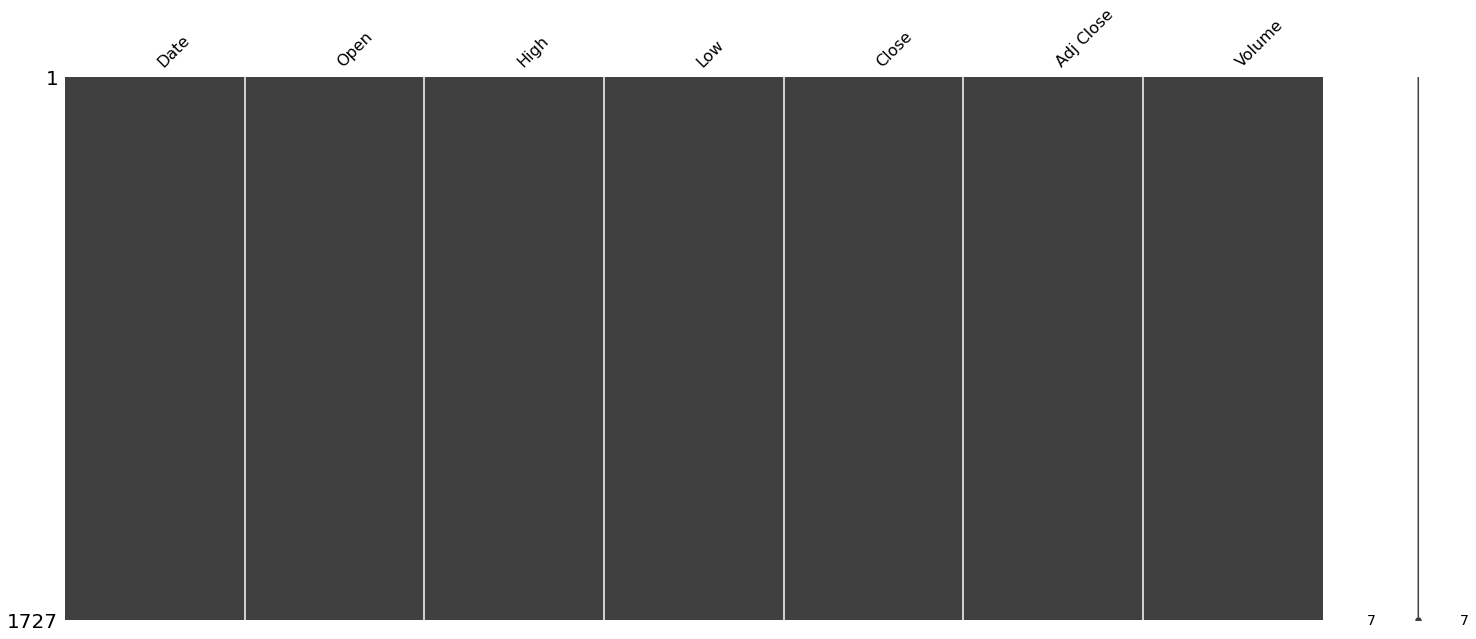

In [7]:
msno.matrix(df)

In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data preparation

In [9]:
df1=df.copy()

In [10]:
#Coverting date column to datetime data type
df1['Date'] = df1['Date'].apply(pd.to_datetime)

In [11]:
#Extracting Month, Week, Day,Day of week
df1["Month"] = df1.Date.dt.month
df1["Week"] = df1.Date.dt.week
df1["Day"] = df1.Date.dt.day
df1["Day of week"] = df1.Date.dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#Setting date column as index
df1.set_index("Date", drop=False, inplace=True)
df1.iloc[:,15:19].head()

""
Date
2015-08-31
2015-09-01
2015-09-02
2015-09-03
2015-09-04


In [13]:
#Checking for null values
df1.isnull().sum()


Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Month          0
Week           0
Day            0
Day of week    0
dtype: int64

In [14]:
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
sns.set_style("whitegrid")
%matplotlib inline
import altair as alt 
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

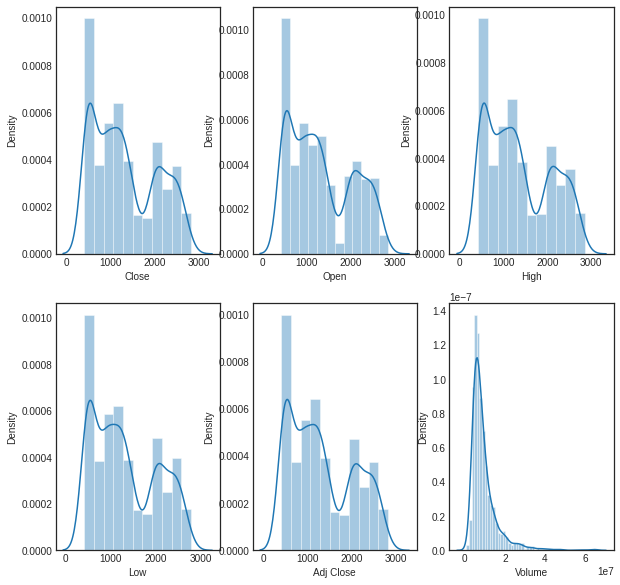

In [15]:
#Size and style of the plot
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Subplots of distplot
plt.subplot(231)
sns.distplot(df1['Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df1['Open'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df1['High'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df1['Low'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df1['Adj Close'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(df1['Volume'])
fig = plt.gcf()
fig.set_size_inches(10,10)


### Univariate analysis of Open, Close, High, Low, Adj Close and Volume over years

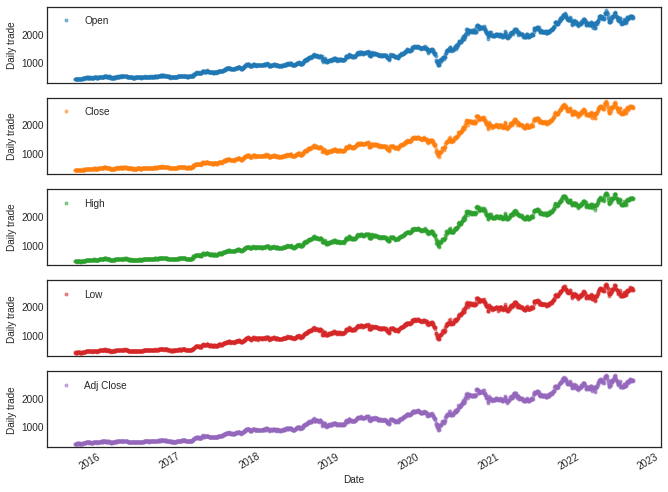

In [16]:
cols_plot = ['Open', 'Close', 'High','Low', 'Adj Close']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

In [17]:
fig = px.line(df1, x='Date', y='Volume',title='Volume over Years(Use Rangeslider to slide over time)')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

## Bivariate analysis
Let's compare two factors over time



In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=df1['Date'],
         y=df1['Open'],
         name='Open',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=df1['Date'],
         y=df1['Close'],
         name='Close',
    line=dict(color='red'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(title_text='Open Vs Close',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=df1['Date'],
         y=df1['High'],
         name='High',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=df1['Date'],
         y=df1['Low'],
         name='Low',
    line=dict(color='red'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
    
fig.update_layout(title_text='High Vs Low',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

## Moving average analysis
Moving average is a smoothing technique applied to time series to remove the fine-grained variation between time steps.The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.

In [20]:
#Making a copy
re=df1.copy()
#Reset index
re.reset_index(drop=True, inplace=True)
#Creating lag features
re_features = ["High", "Low", "Adj Close", "Volume"]


In [21]:
# Taking the number of days in window
window1 = 3
window2 = 7
window3 = 30

#Rolling mean
df_rolled_3d = re[re_features].rolling(window=window1, min_periods=0)
df_rolled_7d = re[re_features].rolling(window=window2, min_periods=0)
df_rolled_30d = re[re_features].rolling(window=window3, min_periods=0)




In [22]:
import numpy as np

#Moving average
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

In [23]:
#Standard deviation
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)



In [24]:
#Moving average
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

In [25]:
#Standard deviation
df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

In [26]:
# Adding the features to the dataframe
for feature in re_features:
    re[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    re[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    re[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    re[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    re[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    re[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

In [27]:
re.fillna(re.mean(), inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [28]:
#Setting Date as index
re.set_index("Date", drop=False, inplace=True)
re.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Week,Day,...,Adj Close_mean_lag30,Adj Close_std_lag3,Adj Close_std_lag7,Adj Close_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-31,2015-08-31,432.326965,432.326965,422.891418,423.931549,407.605621,9557173,8,36,31,...,1304.053345,16.179382,24.700274,49.916412,9453217.0,9458112.0,9473614.0,2.941856e+06,3.638460e+06,4.641550e+06
2015-09-01,2015-09-01,422.940948,422.940948,413.629211,415.981903,399.962128,9989485,9,36,1,...,407.605621,16.179382,24.700274,49.916412,9557173.0,9557173.0,9557173.0,2.941856e+06,3.638460e+06,4.641550e+06
2015-09-02,2015-09-02,421.009247,424.525909,417.343994,420.786377,404.581573,9069565,9,36,2,...,403.783875,5.404766,5.404766,5.404766,9773329.0,9773329.0,9773329.0,3.056908e+05,3.056908e+05,3.056908e+05
2015-09-03,2015-09-03,423.015228,426.333771,418.235535,422.916168,406.629364,5381078,9,36,3,...,404.049774,3.849396,3.849396,3.849396,9538741.0,9538741.0,9538741.0,4.602369e+05,4.602369e+05,4.602369e+05
2015-09-04,2015-09-04,420.860657,420.860657,408.676147,414.025452,398.081024,7476274,9,36,4,...,404.694672,3.415278,3.397372,3.397372,8146709.5,8499325.0,8499325.0,2.438873e+06,2.112523e+06,2.112523e+06


In [29]:
re.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1727 entries, 2015-08-31 to 2022-08-30
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1727 non-null   datetime64[ns]
 1   Open                  1727 non-null   float64       
 2   High                  1727 non-null   float64       
 3   Low                   1727 non-null   float64       
 4   Close                 1727 non-null   float64       
 5   Adj Close             1727 non-null   float64       
 6   Volume                1727 non-null   int64         
 7   Month                 1727 non-null   int64         
 8   Week                  1727 non-null   int64         
 9   Day                   1727 non-null   int64         
 10  Day of week           1727 non-null   int64         
 11  High_mean_lag3        1727 non-null   float32       
 12  High_mean_lag7        1727 non-null   float32       
 13  

In [30]:
#Converting multiple columns from float to int using DataFrame.apply(np.int64)

# displaying the datatypes
display(re.dtypes)
  


Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Close                          float64
Adj Close                      float64
Volume                           int64
Month                            int64
Week                             int64
Day                              int64
Day of week                      int64
High_mean_lag3                 float32
High_mean_lag7                 float32
High_mean_lag30                float32
High_std_lag3                  float32
High_std_lag7                  float32
High_std_lag30                 float32
Low_mean_lag3                  float32
Low_mean_lag7                  float32
Low_mean_lag30                 float32
Low_std_lag3                   float32
Low_std_lag7                   float32
Low_std_lag30                  float32
Adj Close_mean_lag3            float32
Adj Close_mean_lag7            float32
Adj Close_mean_lag30     

In [31]:
# converting 'Field_2' and 'Field_3' from float to int
re['Open'] = re['Open'].apply(np.float32)
re['High'] = re['High'].apply(np.float32)
re['Low'] = re['Low'].apply(np.float32)
re['Close'] = re['Close'].apply(np.float32)
re['Adj Close'] = re['Adj Close'].apply(np.float32)

  
# displaying the datatypes
display(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [32]:
# converting 'Field_2' and 'Field_3' from float to int
re['Open'] = re['Open'].apply(np.int32)
re['High'] = re['High'].apply(np.int32)
re['Low'] = re['Low'].apply(np.int32)
re['Close'] = re['Close'].apply(np.int32)
re['Adj Close'] = re['Adj Close'].apply(np.int32)

re['High_mean_lag3'] = re['High_mean_lag3'].apply(np.int32)
re['High_mean_lag7'] = re['High_mean_lag7'].apply(np.int32)
re['High_mean_lag30'] = re['High_mean_lag30'].apply(np.int32)
re['High_std_lag3'] = re['High_std_lag3'].apply(np.int32)
re['High_std_lag7'] = re['High_std_lag7'].apply(np.int32)
re['High_std_lag30'] = re['High_std_lag30'].apply(np.int32)

re['Low_mean_lag3'] = re['Low_mean_lag3'].apply(np.int32)
re['Low_mean_lag7'] = re['Low_mean_lag7'].apply(np.int32)
re['Low_mean_lag30'] = re['Low_mean_lag30'].apply(np.int32)
re['Low_std_lag3'] = re['Low_std_lag3'].apply(np.int32)
re['Low_std_lag7'] = re['Low_std_lag7'].apply(np.int32)
re['Low_std_lag30'] = re['Low_std_lag30'].apply(np.int32)


re['Adj Close_mean_lag3'] = re['Adj Close_mean_lag3'].apply(np.int32)
re['Adj Close_mean_lag7'] = re['Adj Close_mean_lag7'].apply(np.int32)
re['Adj Close_mean_lag30'] = re['Adj Close_mean_lag30'].apply(np.int32)
re['Adj Close_std_lag3'] = re['Adj Close_std_lag3'].apply(np.int32)
re['Adj Close_std_lag7'] = re['Adj Close_std_lag7'].apply(np.int32)
re['Adj Close_std_lag30'] = re['Adj Close_std_lag30'].apply(np.int32)
  
re['Volume_mean_lag3'] = re['Volume_mean_lag3'].apply(np.int32)
re['Volume_mean_lag7'] = re['Volume_mean_lag7'].apply(np.int32)
re['Volume_mean_lag30'] = re['Volume_mean_lag30'].apply(np.int32)
re['Volume_std_lag3'] = re['Volume_std_lag3'].apply(np.int32)
re['Volume_std_lag7'] = re['Volume_std_lag7'].apply(np.int32)
re['Volume_std_lag30'] = re['Volume_std_lag30'].apply(np.int32)

# displaying the datatypes
display(re.dtypes)

Date                    datetime64[ns]
Open                             int32
High                             int32
Low                              int32
Close                            int32
Adj Close                        int32
Volume                           int64
Month                            int64
Week                             int64
Day                              int64
Day of week                      int64
High_mean_lag3                   int32
High_mean_lag7                   int32
High_mean_lag30                  int32
High_std_lag3                    int32
High_std_lag7                    int32
High_std_lag30                   int32
Low_mean_lag3                    int32
Low_mean_lag7                    int32
Low_mean_lag30                   int32
Low_std_lag3                     int32
Low_std_lag7                     int32
Low_std_lag30                    int32
Adj Close_mean_lag3              int32
Adj Close_mean_lag7              int32
Adj Close_mean_lag30     

In [33]:
re

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Week,Day,...,Adj Close_mean_lag30,Adj Close_std_lag3,Adj Close_std_lag7,Adj Close_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-31,2015-08-31,432,432,422,423,407,9557173,8,36,31,...,1304,16,24,49,9453217,9458112,9473614,2941856,3638460,4641550
2015-09-01,2015-09-01,422,422,413,415,399,9989485,9,36,1,...,407,16,24,49,9557173,9557173,9557173,2941856,3638460,4641550
2015-09-02,2015-09-02,421,424,417,420,404,9069565,9,36,2,...,403,5,5,5,9773329,9773329,9773329,305690,305690,305690
2015-09-03,2015-09-03,423,426,418,422,406,5381078,9,36,3,...,404,3,3,3,9538741,9538741,9538741,460236,460236,460236
2015-09-04,2015-09-04,420,420,408,414,398,7476274,9,36,4,...,404,3,3,3,8146709,8499325,8499325,2438872,2112522,2112522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,2022-08-24,2640,2670,2635,2639,2639,4785579,8,34,24,...,2516,21,21,94,4401307,4079319,5882268,56618,998253,1938994
2022-08-25,2022-08-25,2648,2662,2622,2632,2632,3632902,8,34,25,...,2523,21,20,94,4541125,3928938,5828767,217014,733228,1946612
2022-08-26,2022-08-26,2633,2650,2607,2618,2618,4957449,8,34,26,...,2531,7,20,94,4295033,4012309,5784047,595186,644329,1982003


In [34]:
re.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
Month                   0
Week                    0
Day                     0
Day of week             0
High_mean_lag3          0
High_mean_lag7          0
High_mean_lag30         0
High_std_lag3           0
High_std_lag7           0
High_std_lag30          0
Low_mean_lag3           0
Low_mean_lag7           0
Low_mean_lag30          0
Low_std_lag3            0
Low_std_lag7            0
Low_std_lag30           0
Adj Close_mean_lag3     0
Adj Close_mean_lag7     0
Adj Close_mean_lag30    0
Adj Close_std_lag3      0
Adj Close_std_lag7      0
Adj Close_std_lag30     0
Volume_mean_lag3        0
Volume_mean_lag7        0
Volume_mean_lag30       0
Volume_std_lag3         0
Volume_std_lag7         0
Volume_std_lag30        0
dtype: int64

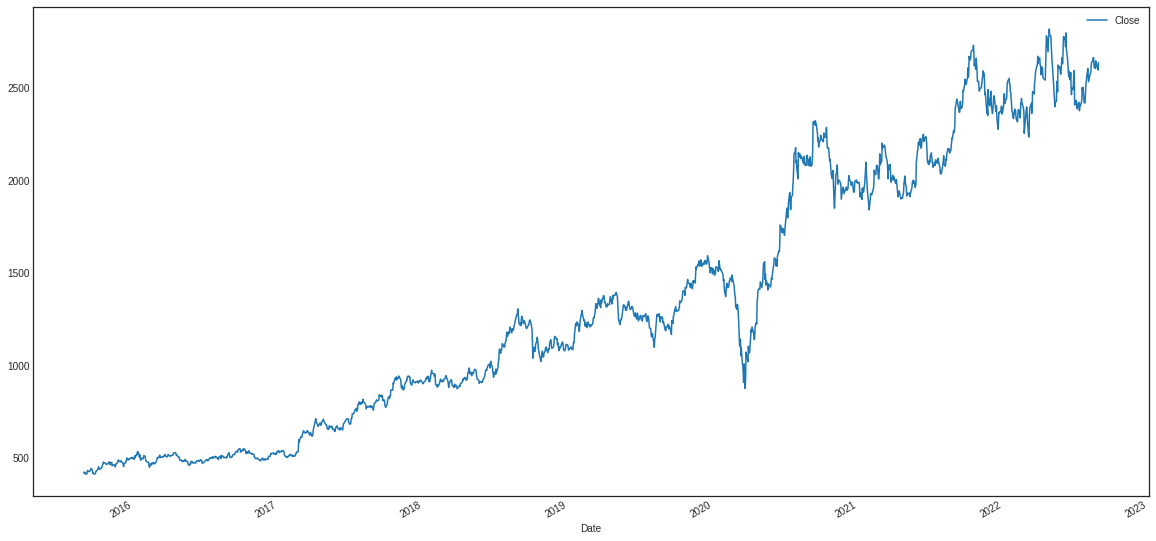

In [35]:
reliance_stationarity=re[['Close']]

reliance_stationarity.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



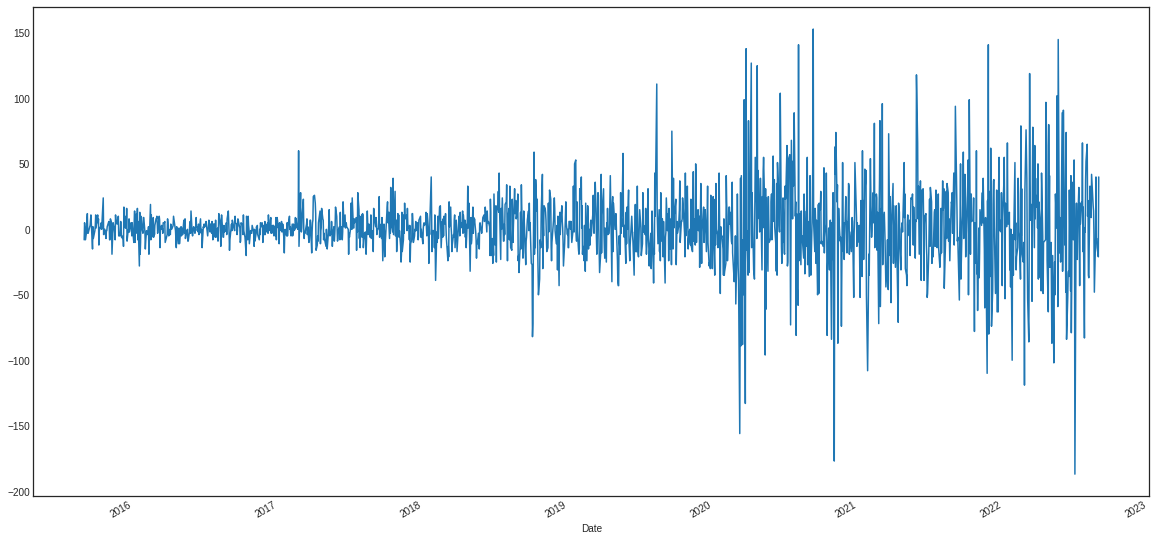

In [36]:
reliance_stationarity['Close First Difference']=reliance_stationarity['Close']-reliance_stationarity['Close'].shift(1)
reliance_stationarity['Close First Difference'].plot()

## Augmented Dickey Fuller Test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
test_result=adfuller(reliance_stationarity['Close'])

#Ho: Data is non stationary
#H1: Data is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(reliance_stationarity['Close'])

ADF Test Statistic : -0.3033361455369007
p-value : 0.9250305033574291
#Lags Used : 0
Number of Observations Used : 1726
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Forecasting & Prediction

In [52]:
!python3 -m pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 37.1 MB/s 
     |████████████████████████████████| 9.8 MB 52.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [53]:
!pip3 uninstall statsmodels

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.13.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.13.2


In [54]:
!pip3 install statsmodels
!pip3 install numpy scipy patsy pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip uninstall pystan

Found existing installation: pystan 3.3.0
Uninstalling pystan-3.3.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pystan-3.3.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/stan/*
Proceed (y/n)? y
  Successfully uninstalled pystan-3.3.0


In [ ]:
#!pip uninstall fbprophet

In [57]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 96 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 827 kB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638940 sha256=b61bce479df84f80e3f10c09212f13f86ae6bbd8bc62dd8edeed907d0bfc7dab
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1 requires cmdstanpy>=1.0.1, but you have cmds

In [39]:
from pmdarima import auto_arima
from fbprophet import Prophet

In [40]:
#Performance metric libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric


In [43]:
train = re[re.Date < "2020"]
valid = re[re.Date >= "2020"]

In [44]:
exogenous_features = ['High_mean_lag3','High_mean_lag7', 'High_mean_lag30', 'High_std_lag3', 'High_std_lag7',
       'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30',
       'Low_std_lag3', 'Low_std_lag7','Low_std_lag30', 'Adj Close_mean_lag3','Adj Close_mean_lag7', 'Adj Close_mean_lag30', 'Adj Close_std_lag3', 'Adj Close_std_lag7',
       'Adj Close_std_lag30' , 'Volume_mean_lag3',
       'Volume_mean_lag7', 'Volume_mean_lag30', 'Volume_std_lag3',
       'Volume_std_lag7', 'Volume_std_lag30', 'Month', 'Week', 'Day', 'Day of week']

In [45]:
model = auto_arima(train.Close, exogenous=train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8769.526, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8767.122, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8767.515, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8772.394, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8766.900, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8768.130, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8768.491, Time=1.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8768.189, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8764.073, Time=2.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8764.971, Time=2.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8761.330, Time=4.46 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8765.874, Time=5.90 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8764.082, Time=4.89 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : 

In [46]:
model.fit(train.Close, exogenous=train[exogenous_features])



ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [47]:
valid["Forecast_ARIMAX"] = model.predict(n_periods=len(valid), exogenous=valid[exogenous_features])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
len(valid)
valid[exogenous_features]

,High_mean_lag3,High_mean_lag7,High_mean_lag30,High_std_lag3,High_std_lag7,High_std_lag30,Low_mean_lag3,Low_mean_lag7,Low_mean_lag30,Low_std_lag3,...,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30,Month,Week,Day,Day of week
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1531,1550,1560,1,26,21,1504,1523,1532,10,...,8769162,9967940,8898616,1285936,2126691,3735554,1,1,1,2
2020-01-02,1525,1537,1560,10,17,20,1499,1510,1533,12,...,8204116,9488834,8649841,1909746,2509696,3636377,1,1,2,3
2020-01-03,1522,1532,1559,8,13,21,1494,1503,1532,3,...,8294350,9001131,8252523,1894713,2361277,2924468,1,1,3,4
2020-01-06,1522,1528,1558,8,7,21,1499,1501,1532,8,...,8106934,9194713,8346166,1611712,2352555,2923820,1,2,6,0
2020-01-07,1522,1524,1557,7,8,23,1496,1499,1531,12,...,9724446,8849126,8379491,1571526,1646091,2952600,1,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,2648,2655,2542,15,15,91,2594,2612,2496,9,...,4401307,4079319,5882268,56618,998253,1938994,8,34,24,2
2022-08-25,2651,2659,2550,19,14,91,2604,2620,2505,27,...,4541125,3928938,5828767,217014,733228,1946612,8,34,25,3
2022-08-26,2662,2660,2558,8,14,91,2616,2619,2512,22,...,4295033,4012309,5784047,595186,644329,1982003,8,34,26,4


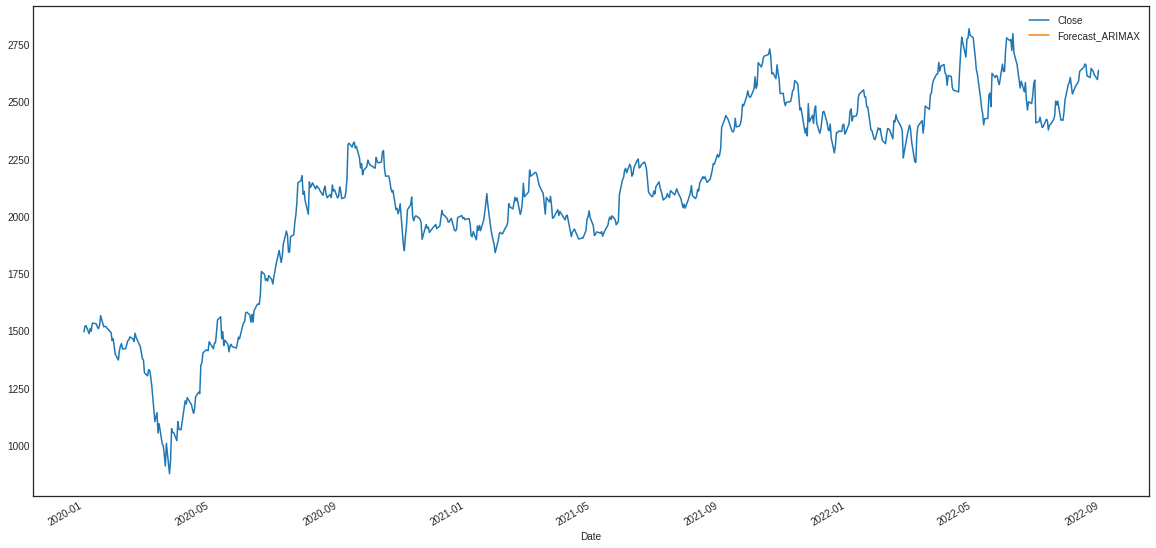

In [49]:
valid[["Close", "Forecast_ARIMAX"]].plot()


In [ ]:
from sklearn.metrics import r2_score
print('Ridge Regressor Coefficient of determination: %.3f' % r2_score(valid.Close,valid.Forecast_ARIMAX))

In [ ]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(valid.Close, valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(valid.Close, valid.Forecast_ARIMAX))


# Forecasting next 7 days stock

In [50]:
### intiialize the Model
model=Prophet()

#Fitting the model and renaming the columns based on prophe requirements
model.fit(re[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
#Making future dataframe for forecasting, we have given 7 days which can calculate Volume for next 7 days
reliance_future=model.make_future_dataframe(periods=7)

#Checking the future dates
reliance_future.tail(7)

,ds
1727,2022-08-31
1728,2022-09-01
1729,2022-09-02
1730,2022-09-03
1731,2022-09-04
1732,2022-09-05
1733,2022-09-06
